<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine.<br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [2]:
# set the plot size using 'rcParams' 
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file 
# pass width and height in inches to 'figure.figsize'  
plt.rcParams['figure.figsize'] = [15,8]

#### Load the first dataset and check the first two observations

In [3]:
# load the csv file
# sep: which synmbol is used as seperator, here it is ';'
df_wine = pd.read_csv('whitewine.csv',sep=';')

# display the first two observations
df_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6


In [4]:
# check data types of variables
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us first see the distribution of the variable 'Volatile acidity'.

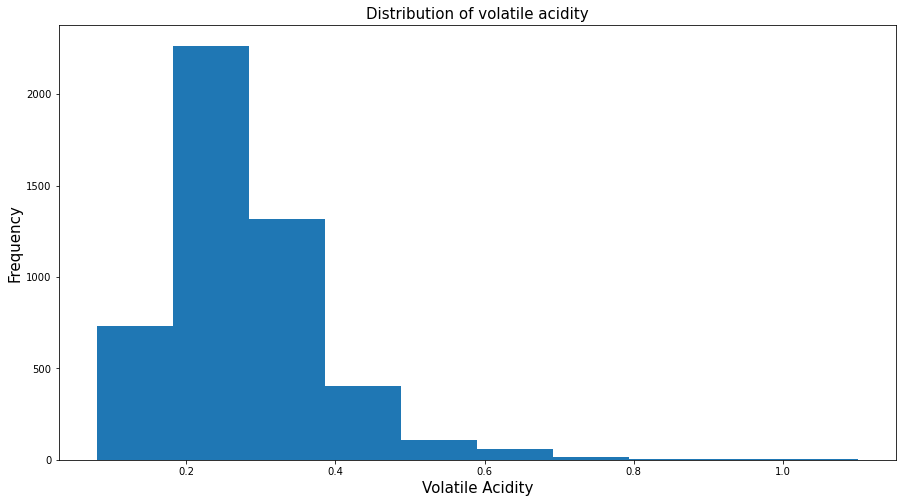

In [5]:
# plot histogram
plt.hist(df_wine['volatile acidity'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of volatile acidity', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Volatile Acidity', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

We see it is positively skewed. So, we shall apply transformation.

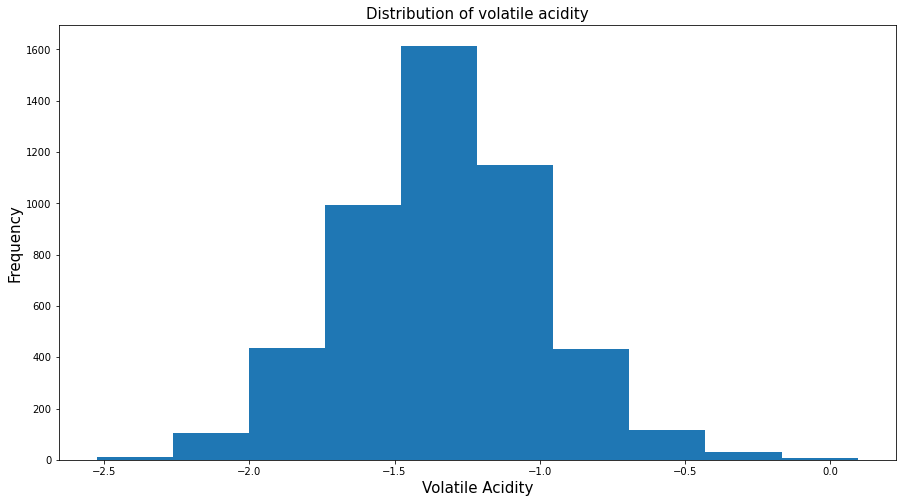

In [6]:
# applying log transformation
df_wine['volatile acidity'] = np.log(df_wine['volatile acidity'])

# plot histogram of log transformed variable
plt.hist(df_wine['volatile acidity'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of volatile acidity', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Volatile Acidity', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

As we can see from the figure above, after applying log transformation the skewness of the variable is reduced and it follows a near normal distribution.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

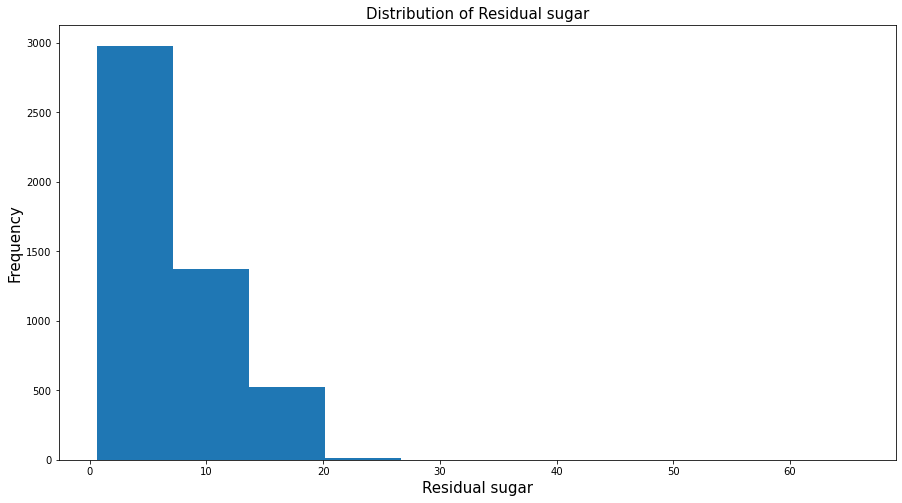

In [7]:
# plot histogram
plt.hist(df_wine['residual sugar'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Residual sugar', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Residual sugar', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

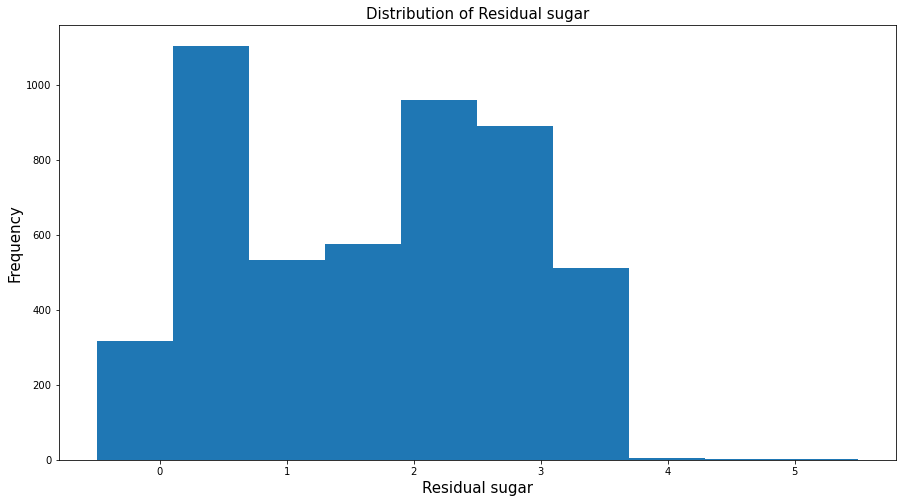

In [8]:
# applying box-cox transformation using boxcox()
# RS_lambda captures the optimal lamba value for box cox transformation
df_wine['residual sugar'], RS_lambda = stats.boxcox(df_wine['residual sugar'])

# plot histogram of transformed residual sugar
plt.hist(df_wine['residual sugar'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Residual sugar', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Residual sugar', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

As we can see the skewness of the 'Residual_sugar' is reduced by using box-cox transformation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# var(): calculates variance for all attributes in dataframe
df_wine.var()

fixed acidity             0.712114
volatile acidity          0.114351
citric acid               0.014646
residual sugar            1.217180
chlorides                 0.000477
free sulfur dioxide     289.242720
total sulfur dioxide   1806.085491
density                   0.000009
pH                        0.022801
sulphates                 0.013025
alcohol                   1.514427
quality                   0.784356
dtype: float64

From the above result we can see the variables `chlorides` and `density` have a near zero variance, which implies they adds almost no new information to the data. Hence they can be eliminated during feature selection. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

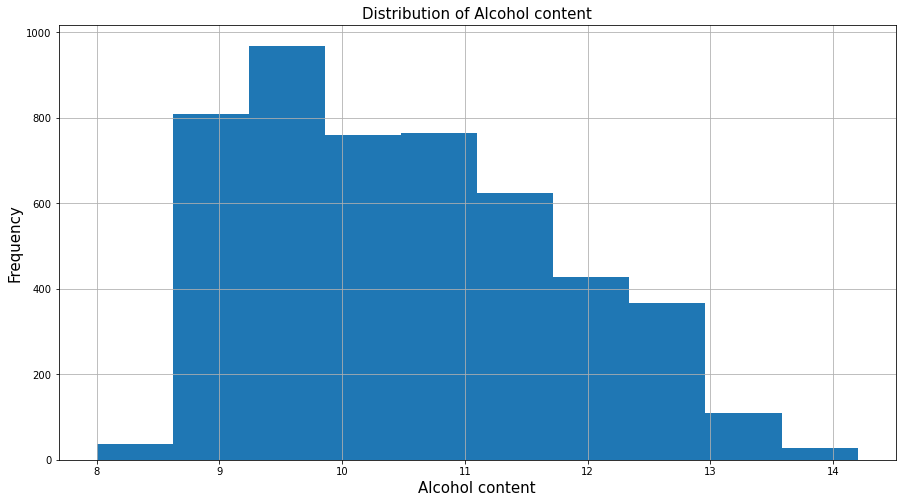

In [10]:
# plot the histogram of variable alcohol
df_wine.alcohol.hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Alcohol content', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Alcohol content', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

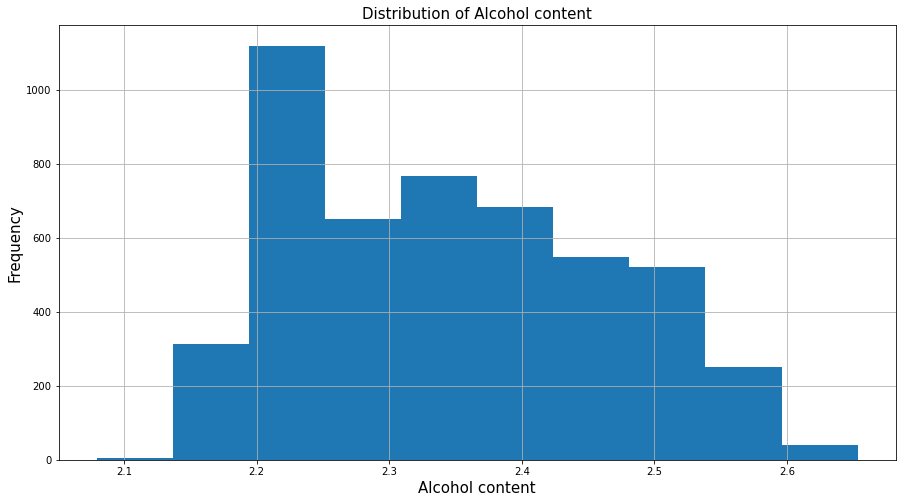

In [11]:
# applying log transformation
new_alcohol = np.log(df_wine.alcohol)

# plot histogram for transformed values of alcohol column
new_alcohol.hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Alcohol content', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Alcohol content', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

Even after log transformation the variable is still skewed, so we try reciprocal transformation

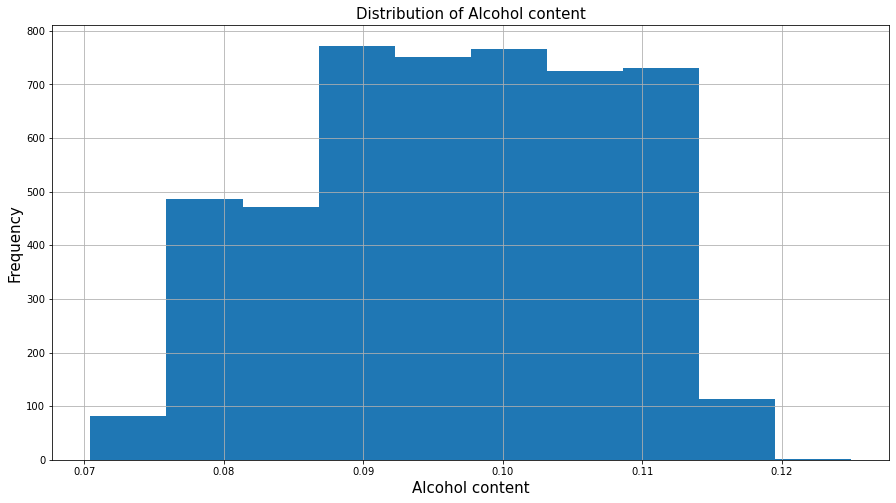

In [12]:
# applying reciprocal transformation
df_wine.alcohol = np.reciprocal(df_wine.alcohol)

# plot histogram for transformed values of alcohol column
df_wine.alcohol.hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Alcohol content', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Alcohol content', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

Hence we can see that reciprocal transform is the most suitable transformation to treat the skweness of variable 'alcohol'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

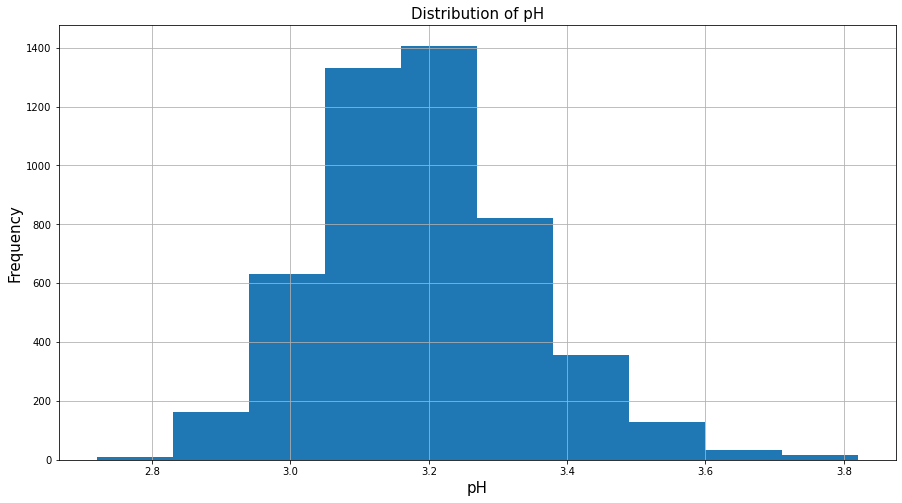

In [13]:
# plot histogram
df_wine.pH.hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of pH', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('pH', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [14]:
# select all features of the data for full model
X = df_wine.iloc[:,:10]
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.45e-295
Time:                        15:41:16   Log-Likelihood:                -5652.5
No. Observations:                4898   AIC:                         1.133e+04
Df Residuals:                    4887   BIC:                         1.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  209.7778 

Since the variable is not highly skewed we can use standardization for the scaling of 'pH' variable

In [15]:
# create the Scaler object
scaler = preprocessing.StandardScaler()

# fit your data on the scaler object
# we pass the column by converting into dataframe since fit_transform() requires a dataframe input
df_wine.pH = scaler.fit_transform(pd.DataFrame(df_wine.pH))

In [16]:
# select all features of the data for full model
X = df_wine.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.45e-295
Time:                        15:41:16   Log-Likelihood:                -5652.5
No. Observations:                4898   AIC:                         1.133e+04
Df Residuals:                    4887   BIC:                         1.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  212.4592 

As we can see the scaling of 'pH' feature does no have any impact on prediction performance since the R<sup>2</sup> value for the both the models is equal. From this we can infer that scaling does not necessarily improve the model even if the range of features are different.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# filter the numerical features in the dataset
# select_dtypes: selects the variable having specified datatype
df_numeric = df_wine.select_dtypes(include=[np.number])

# drop the target variable
# 'axis = 1' drops the specified column
df_numeric = df_numeric.drop("quality", axis = 1)

# create a column of variable names
vif["Features"] = df_numeric.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# print the VIF
print(vif)

                Features        VIF
0          fixed acidity  91.718190
1       volatile acidity  18.927934
2            citric acid   9.922203
3         residual sugar   4.761999
4              chlorides   6.471258
5    free sulfur dioxide   9.282963
6   total sulfur dioxide  25.628547
7                density 190.177133
8                     pH   1.341398
9              sulphates  20.594745
10               alcohol 131.577683


From the above result we can see that multicollinearity is present and to determine the variables that contribute to multicollinearity we use VIF threshold value = 10. Hence to rectify the problem of multicollinearity we need to eliminate the variables `fixed acidity`,`volatile acidity`,`total sulfur dioxide`,`density`, `sulphates` and `alcohol`.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# select all features of the data for full model
X = df_wine.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# obtain the residuals using resid
residuals = MLR_model.resid

# print model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.45e-295
Time:                        15:41:16   Log-Likelihood:                -5652.5
No. Observations:                4898   AIC:                         1.133e+04
Df Residuals:                    4887   BIC:                         1.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  212.4592 

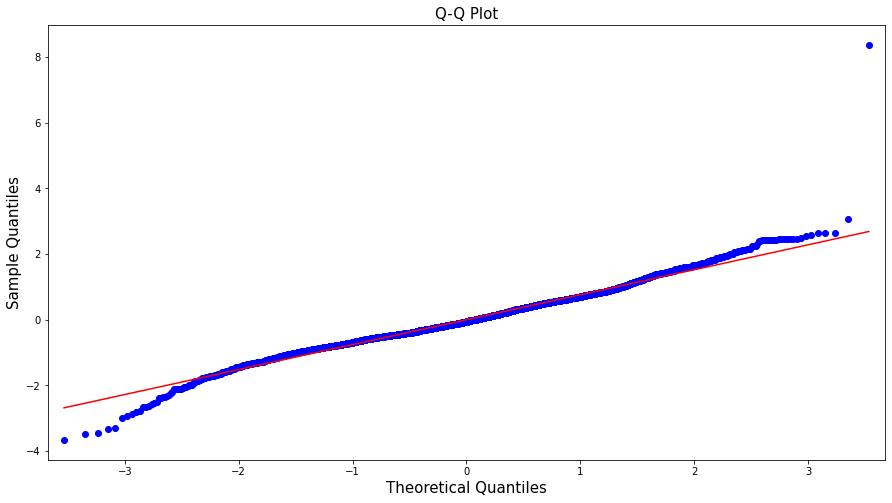

In [19]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set the plot title
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)

# set the x-axis label
# set text size using 'fontsize'
plt.xlabel('Theoretical Quantiles', fontsize = 15)

# set the y-axis label
# set text size using 'fontsize'
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

As we can see from the above plot the residuals do follow a near normal distribution

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us check the distribution of citric acid

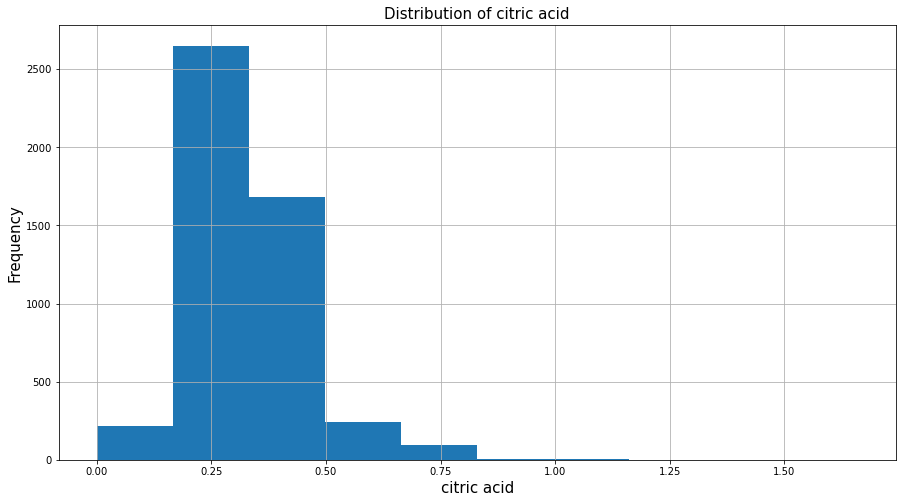

In [20]:
# plot histogram
df_wine['citric acid'].hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of citric acid', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('citric acid', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [21]:
# select all features of the data for full model
X = df_wine.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.45e-295
Time:                        15:41:16   Log-Likelihood:                -5652.5
No. Observations:                4898   AIC:                         1.133e+04
Df Residuals:                    4887   BIC:                         1.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  212.4592 

In [22]:
# perform square root transformation
df_wine['citric acid'] = np.sqrt(df_wine['citric acid'])

In [23]:
# select all features of the data for full model
X = df_wine.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     163.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          7.23e-297
Time:                        15:41:16   Log-Likelihood:                -5648.6
No. Observations:                4898   AIC:                         1.132e+04
Df Residuals:                    4887   BIC:                         1.139e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  211.3771 

We have used square root transformation since the variable 'citric acid' takes near zero values. After transformation we can see the R<sup>2</sup> value has slightely increased hence this transformation leads to a slight improvement in model performance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

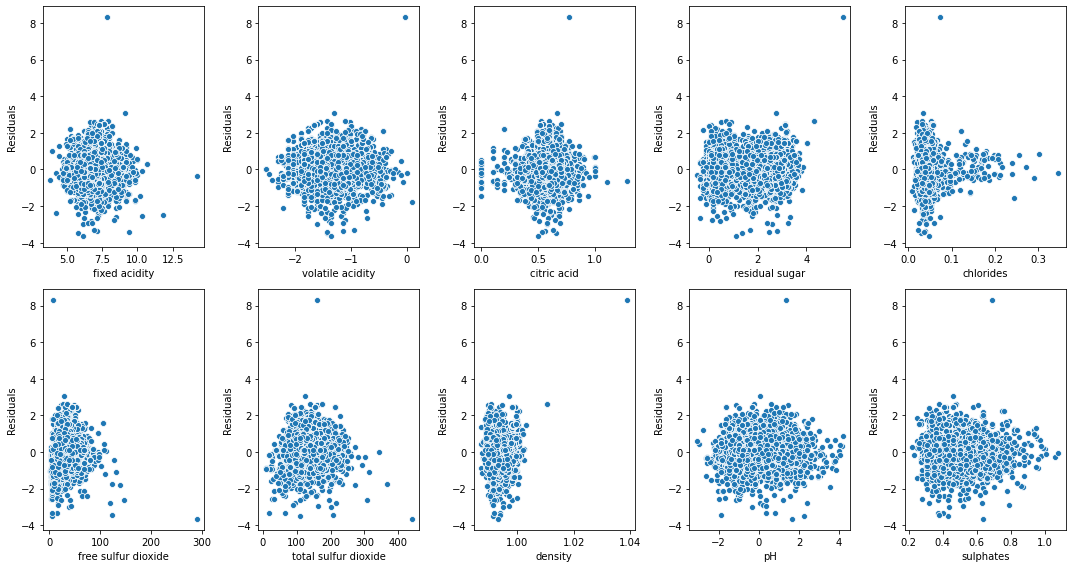

In [24]:
# select all features of the data for full model
X = df_wine.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_wine['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# capture residuals for the model
residuals = MLR_model.resid

# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 5, figsize=(15,8))

# use for loop to create scatter plot for residuals and each independent variable (do not cosider the intercept)
# 'ax' assigns axes object to draw the plot onto
# set_ylabel() is used to set label to y axis
for variable, subplot in zip(X.columns[1:], ax.flatten()):
    z = sns.scatterplot(X[variable], residuals , ax=subplot)
    z.set_ylabel("Residuals", fontsize = 10)

    
plt.tight_layout()
# display the plot
plt.show()

We can see that since there is no pattern observed in plots for variables `fixed acidity`,`volatile acidity`, `citric acid`, `residual sugar`, `total sulfur dioxide`, `density` and `pH`, these variables vary linearly with the target variable.

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_wine.drop('quality', axis = 1)

# dependent variable
y = df_wine['quality']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg = LinearRegression()

In [26]:
# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '5' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 5, forward = True, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-11-02 15:41:17] Features: 1/5 -- score: 0.1768294545295732[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-11-02 15:41:17] Features: 2/5 -- score: 0.2225955408959681[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-11-02 15:41:18] Features: 3/5 -- score: 0.24814099958287109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [27]:
# print the selected feature names when k_features = 5
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol')

R-squared:  0.25925031726784187


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build backward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 5, forward = False, verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-11-02 15:41:18] Features: 10/5 -- score: 0.26272797106730666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-11-02 15:41:18] Features: 9/5 -- score: 0.26284989675041903[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-11-02 15:41:18] Features: 8/5 -- score: 0.26292539544329296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [29]:
# print the selected feature names when k_features = 5 
print('Features selelected using backward elimination are: \n', sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
 ('volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol')

R-squared:  0.2596014080792644


We can see that the R-Squared score obtained from backward selection is more than that from backward elimination. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# (2,6) means that all the possible subsets sequentially will be created 
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = (2,6), forward = True, verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward_range = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-11-02 15:41:18] Features: 1/6 -- score: 0.1768294545295732[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-11-02 15:41:18] Features: 2/6 -- score: 0.2225955408959681[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-11-02 15:41:18] Features: 3/6 -- score: 0.24814099958287109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [31]:
# print the selected feature names when k_features = (2, 6)
print('Features selelected using forward selection are: \n ',sfs_forward_range.k_feature_names_)

# print the R- squared value
print('\nR-squared: ', sfs_forward_range.k_score_)

Features selelected using forward selection are: 
  ('fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol')

R-squared:  0.26131803984442514


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-11-02 15:41:19] Features: 1/11 -- score: 0.1768294545295732[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-11-02 15:41:19] Features: 2/11 -- score: 0.2225955408959681[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-11-02 15:41:19] Features: 3/11 -- score: 0.24814099958287109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [33]:
# print the selected feature names 
print('Features selelected using forward selection are:\n ', sfs_forward.k_feature_names_)

# print the R- squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are:
  ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol')

R-Squared:  0.26292539544329296


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-11-02 15:41:19] Features: 10/1 -- score: 0.26272797106730666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-11-02 15:41:19] Features: 9/1 -- score: 0.26284989675041903[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-11-02 15:41:19] Features: 8/1 -- score: 0.26292539544329296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [35]:
# print the selected feature names when k_features = 'best'
print('Features selelected using backward elimination are: \n ', sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
  ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol')

R-squared:  0.26292539544329296


The R-Squared score obtained using backward elimination is more than that of forward selection.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# Build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['volatile acidity', 'residual sugar', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


Lets create a linear regression model using the significant variables obtained after RFE.

In [37]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[signi_feat_rfe]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
r2_value_rfe = linreg.score(new_X_train, y_train)

# print the r-scored value
print('The r-squared value for the model built using the variables obtained using RFE is: ', r2_value_rfe)

The r-squared value for the model built using the variables obtained using RFE is:  0.2670600321282073


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# storing the significant variables obtained after performing the forward selection
sfs_features = sfs_forward.k_feature_names_

# Creating a subset of X_train and X_test using sfs_features
new_X_train = X_train.loc[:,sfs_features]
new_X_test = X_test.loc[:,sfs_features]

# initiate the Linear Regression model
linreg = LinearRegression()

# fit the model 
linreg.fit(new_X_train, y_train)

LinearRegression()

In [39]:
# for training set:
# train_pred: Prediction made by the model on the training dataset 'X_train'
# y_train: Actual values of the target variable for the train dataset

# for testing set:
# test_pred: Prediction made by the model on the test dataset 'y_train'
# y_test: Actual values of the target variable for the test dataset

# predict the output of the target variable from the train data
# train_pred can also be obtained from "MLR_model_with_significant_var.fittedvalues"
train_pred = linreg.predict(new_X_train)

# predict the output of the target variable from the test data
test_pred = linreg.predict(new_X_test)

# calculate the mse using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the mse and then rounding the value upto 4 digits
rmse_train = round(np.sqrt(mse_train), 4)

# print the rmse for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)

# print the rmse for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.7576
Root Mean Squared Error (RMSE) on test set:  0.7512


From the RMSE values for the train set and the test set, we can see that the errors are nearly same. Thus, we can conclude that the model is not overfitted on the training data.

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# create a new feature for better understanding of pH 
# create an empty list
ph_verbose=[]

# for the pH value equal to 7 append the list ph_verbose with 'Neutral'
# for the pH value greater than 7 append the list ph_verbose with 'Basic'
# for the pH value less than 7 append the list ph_verbose with 'Acidic'
for i in range(0,df_wine.pH.shape[0]):
    if df_wine.pH.iloc[i] == 7:
        ph_verbose.append('Neutral')
    elif df_wine.pH.iloc[i]>7:
        ph_verbose.append('Basic')    
    elif df_wine.pH.iloc[i]<7:
        ph_verbose.append('Acidic')

# create a new feature 'pH_verbose' with elements as 'ph_verbose'       
df_wine["pH_verbose"] = ph_verbose 

In [41]:
# print the count for each category
df_wine["pH_verbose"].value_counts()

Acidic    4898
Name: pH_verbose, dtype: int64

We see that there is only one value in the feature. Thus, it can be removed.

In [42]:
# drop the variable 'pH_verbose'
# # drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
# 'inplace = True': makes the change in the original memory location of the dataframe
df_wine.drop("pH_verbose", axis = 1, inplace = True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# creating a function get_score that returns the R-squared score for the training set
# get_score takes 5 parameters
def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                # fit the model 
    return model.score(X_test_k, y_test_k)                         # return the R-squared value

In [44]:
# copying the original dataset
df_wine_copy = df_wine.copy()

# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_wine_copy.drop('quality', axis = 1)

# dependent variable
y = df_wine_copy['quality']

# split data into train subset and test subset using train_test_split()
# 'test_size' returns the proportion of data to be included in the testing set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [45]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter 
# e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = X_train, 
                            y = y_train, 
                            cv = 2, 
                            scoring = 'r2',
                         )

In [46]:
# print all scores 
print('All scores: ', scores)  

# print the minimum score from the list 
# use 'round()' to round-off the minimum score upto 4 digits 
# min() returns minimum score  
print("\nMinimum score obtained: ", round(min(scores), 4)) 

# print the maximum score from the list 
# use 'round()' to round-off the maximum score upto 4 digits 
# max() returns maximum score  
print("Maximum score obtained: ", round(max(scores), 4))  

# print the average score from the list 
# use 'round()' to round-off the average score upto 4 digits 
# np.mean() returns average score  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.26950597 0.26298895]

Minimum score obtained:  0.263
Maximum score obtained:  0.2695
Average score obtained:  0.2662


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# n_splits: specify the number of k folds
kf = KFold(n_splits = 5)

In [48]:
# create an empty list to store the scores
scores = []

# kf.split() splits the indices of X_train into train_index and test_index
# further dividing the X_train and y_train sets into train and test sets for cross validation
# Remember: Cross validation works on training set not on test set

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    # calling the function 'get_scores()' and appending the scores in the list 'scores'
    scores.append(get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k))
    
# print all scores 
print('All scores: ', scores)  

# print the minimum score from the list 
# use 'round()' to round-off the minimum score upto 4 digits 
# min() returns minimum score  
print("\nMinimum score obtained: ", round(min(scores), 4)) 

# print the maximum score from the list 
# use 'round()' to round-off the maximum score upto 4 digits 
# max() returns maximum score  
print("Maximum score obtained: ", round(max(scores), 4))  

# print the average score from the list 
# use 'round()' to round-off the average score upto 4 digits 
# np.mean() returns average score  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.3025330978340006, 0.2145782726274531, 0.2248655906279018, 0.31626109791391577, 0.2314969913284417]

Minimum score obtained:  0.2146
Maximum score obtained:  0.3163
Average score obtained:  0.2579


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# copying the original dataset
df_wine_copy = df_wine.copy()

# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_wine_copy.drop('quality', axis = 1)

# dependent variable
y = df_wine_copy['quality']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [50]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    linreg = LinearRegression()
    
    # fit the OLS model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [51]:
# print the minimum rmse from the list 
# use 'round()' to round-off the minimum rmse upto 4 digits 
# min() returns minimum rmse  
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))  

# print the maximum rmse from the list 
# use 'round()' to round-off the maximum rmse upto 4 digits 
# max() returns maximum rmse  
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))  

# print the average rmse from the list 
# use 'round()' to round-off the average rmse upto 4 digits 
# np.mean() returns average rmse  
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0002
Maximum rmse obtained:  5.7922
Average rmse obtained:  0.5909
